# Explore here

Se han recopilado datos sociodemográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos sociodemográficos.

Para ello, es necesario que establezcas una variable objetivo (relacionada con la salud) para llevar a cabo el análisis.

In [15]:
# Your code here

# Your code here
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
#total_data.head ()
# Obtener los nombres de las columnas
nombres_columnas = total_data.columns.tolist()

# Imprimir los nombres de las columnas
print(nombres_columnas)
#total_data.to_csv("../data/raw/total_data.csv", index = False)


['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with les

In [2]:
#### dimensiones del dataframe
total_data.shape
#'diabetes_number', 'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)'

(3140, 108)

In [3]:
##### datos null y tipo de datos que hay en mi dataframe
total_data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [4]:
##### Para ver falta de data
total_data.isnull().sum ()

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_prevalence            0
CKD_Lower 95% CI          0
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
Length: 108, dtype: int64

In [16]:
###duplicados
total_data = total_data.drop_duplicates().reset_index(drop = True)
print (total_data)

       fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.814964  25213   
2                    

In [17]:
print(total_data.describe())

               fips       TOT_POP           0-9  0-9 y/o % of total pop  \
count   3140.000000  3.140000e+03  3.140000e+03             3140.000000   
mean   30401.640764  1.041894e+05  1.274030e+04               11.871051   
std    15150.559265  3.335834e+05  4.180730e+04                2.124081   
min     1001.000000  8.800000e+01  0.000000e+00                0.000000   
25%    18180.500000  1.096325e+04  1.280500e+03               10.594639   
50%    29178.000000  2.580050e+04  3.057000e+03               11.802727   
75%    45081.500000  6.791300e+04  8.097000e+03               12.951840   
max    56045.000000  1.010552e+07  1.208253e+06               25.460677   

             19-Oct  10-19 y/o % of total pop         20-29  \
count  3.140000e+03               3140.000000  3.140000e+03   
mean   1.336798e+04                 12.694609  1.446933e+04   
std    4.228439e+04                  1.815044  4.957773e+04   
min    0.000000e+00                  0.000000  0.000000e+00   
25%    1.

In [7]:
# Seleccionar columnas categóricas
variables_categoricas = total_data.select_dtypes(include=['object'])

# Mostrar las columnas categóricas
print(variables_categoricas)

     COUNTY_NAME STATE_NAME
0        Autauga    Alabama
1        Baldwin    Alabama
2        Barbour    Alabama
3           Bibb    Alabama
4         Blount    Alabama
...          ...        ...
3135  Sweetwater    Wyoming
3136       Teton    Wyoming
3137       Uinta    Wyoming
3138    Washakie    Wyoming
3139      Weston    Wyoming

[3140 rows x 2 columns]


In [8]:
###Factorizar la variable
total_data["COUNTY_NAME"] = pd.factorize(total_data["COUNTY_NAME"])[0]
total_data["STATE_NAME"] = pd.factorize(total_data["STATE_NAME"])[0]

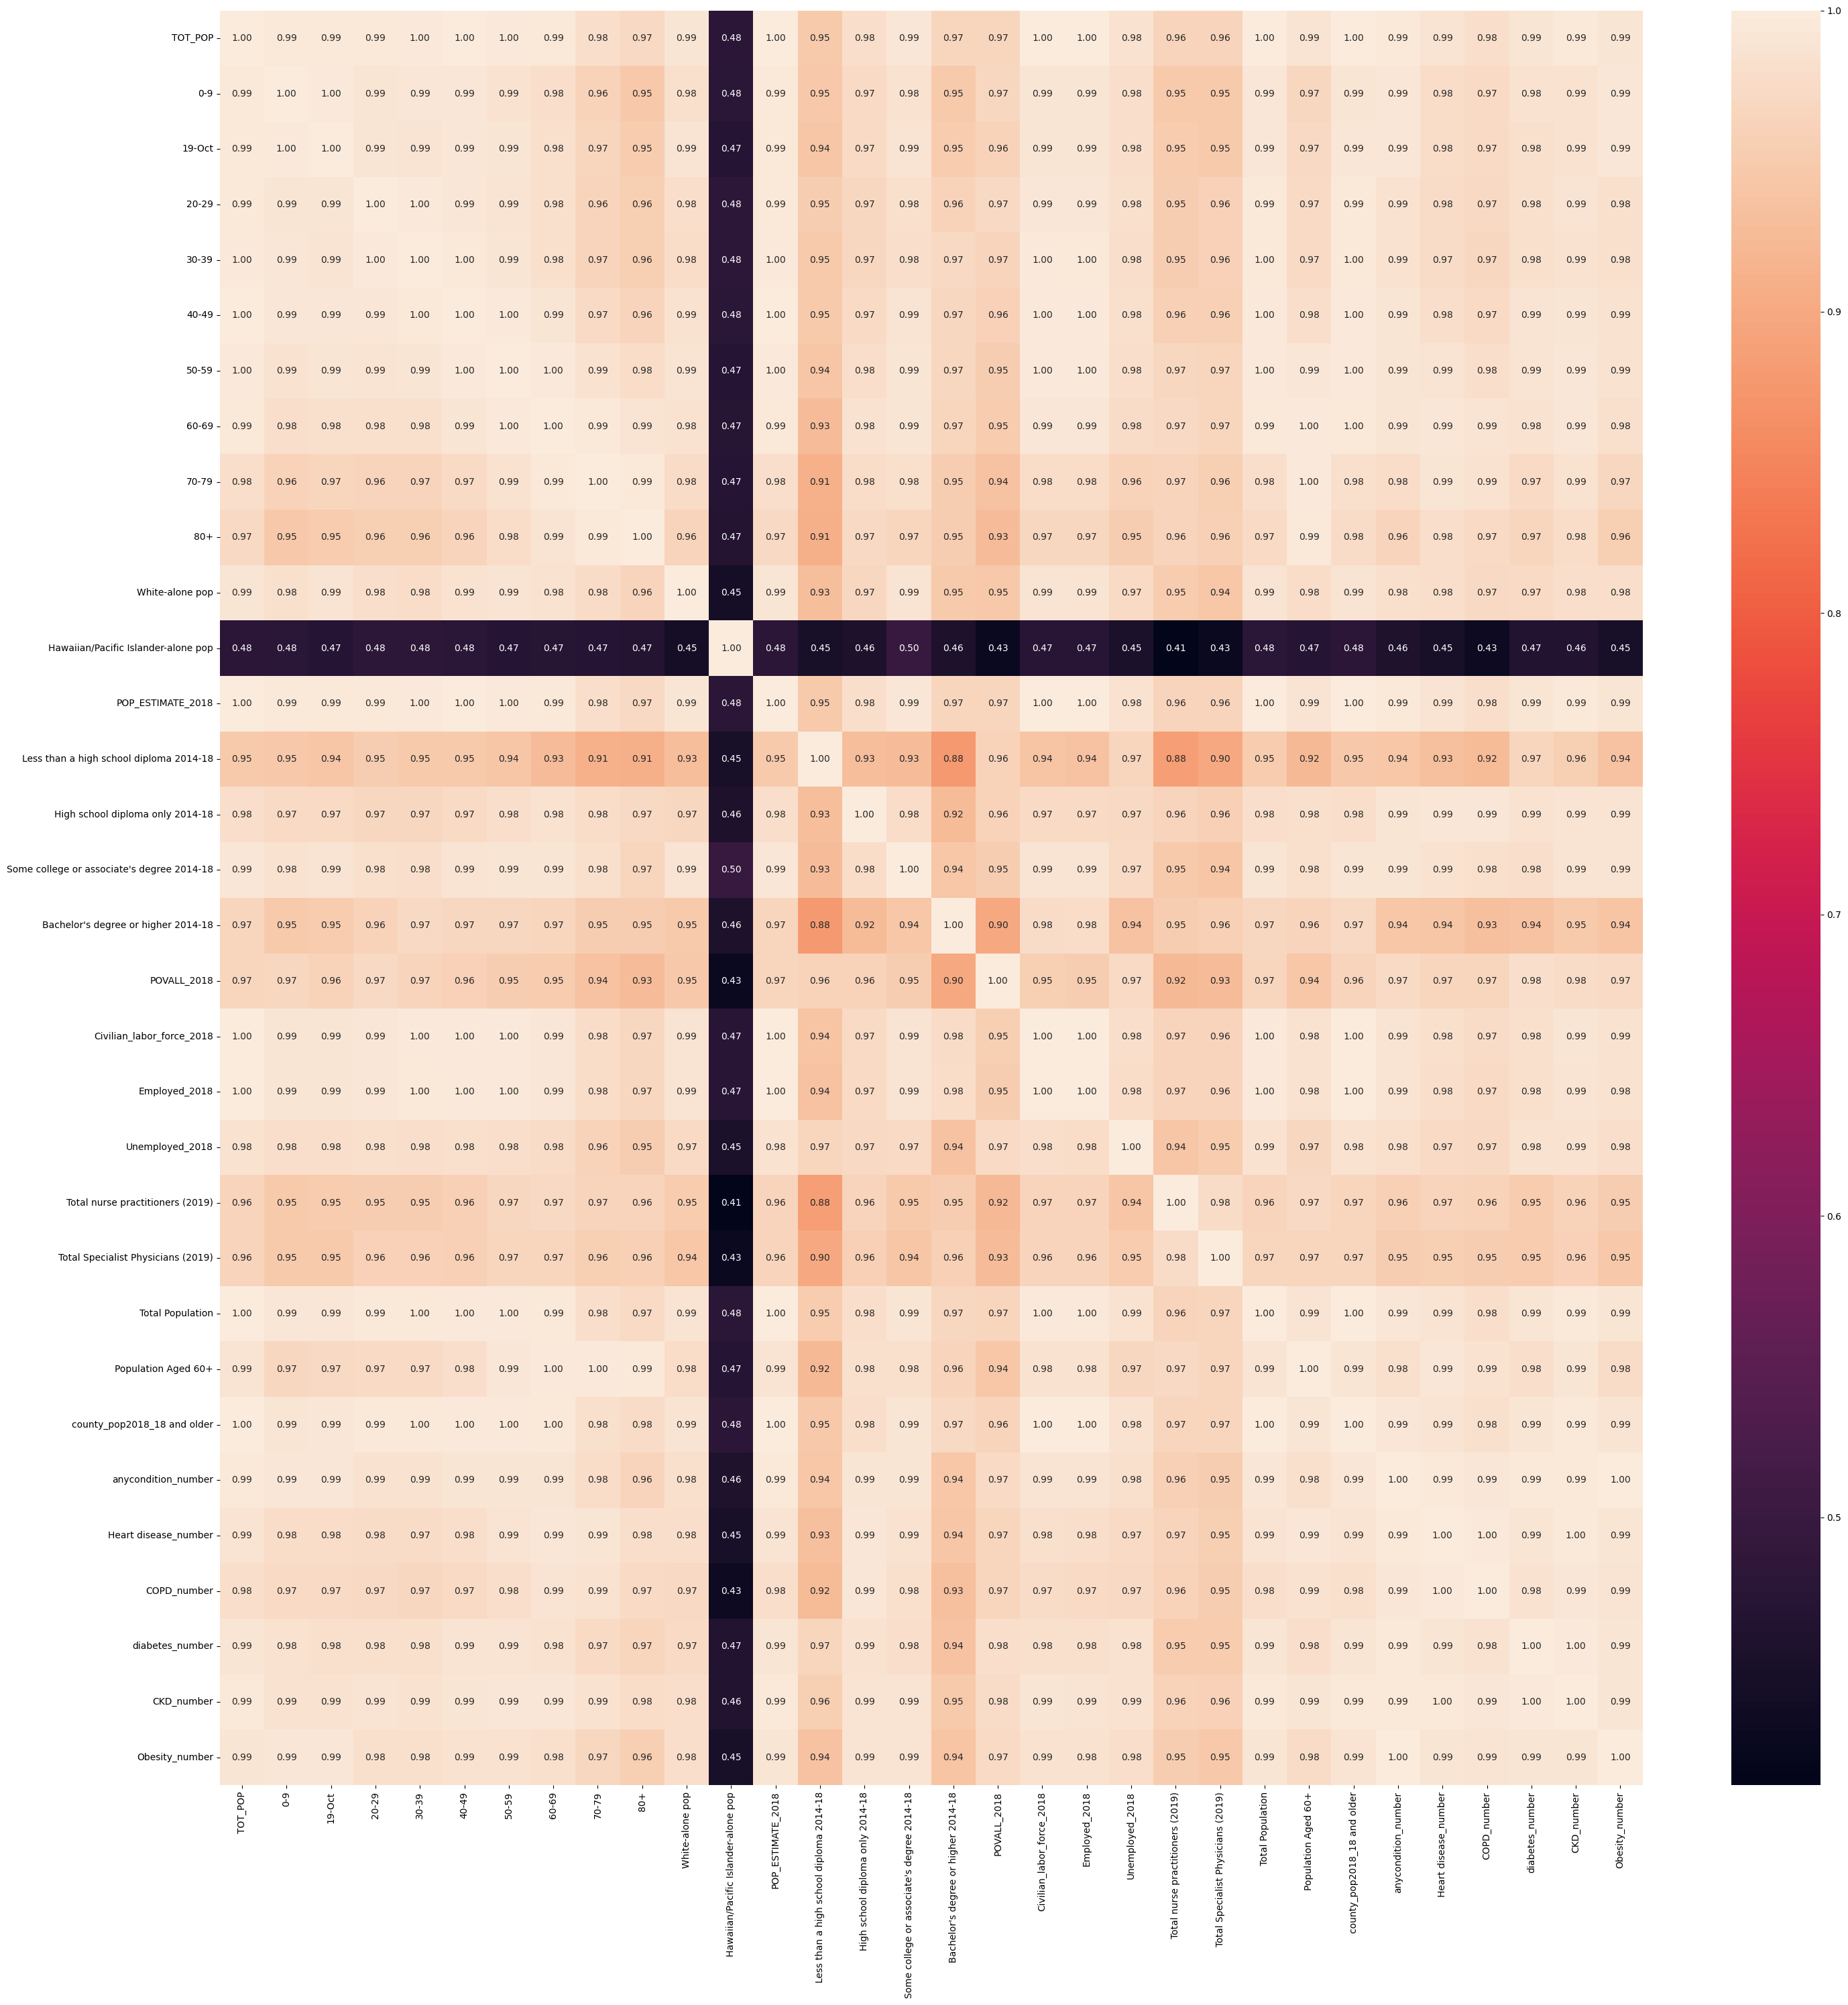

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

fig, axis = plt.subplots(figsize = (30, 30))

#numeric_columns = total_data.select_dtypes(include=['number'])
select_variables=[
    'TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
    'White-alone pop', 'Hawaiian/Pacific Islander-alone pop', 'POP_ESTIMATE_2018',
    'Less than a high school diploma 2014-18', 'High school diploma only 2014-18',
    'Some college or associate\'s degree 2014-18', 'Bachelor\'s degree or higher 2014-18',
    'POVALL_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
    'Total nurse practitioners (2019)', 'Total Specialist Physicians (2019)',
    'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older',
    'anycondition_number', 'Heart disease_number', 'COPD_number', 'diabetes_number', 'CKD_number', 'Obesity_number'
]

variables=total_data[select_variables]

sns.heatmap(variables.corr(), annot = True, fmt = ".2f")


plt.tight_layout()

plt.show ()

In [10]:
################OTRA FORMA DE HACER LAS CORRELACIONES (TABLA)

import warnings
import pandas as pd
warnings.filterwarnings("ignore", category=FutureWarning)

# Calcula la matriz de correlación
correlation_matrix = total_data.corr()

# Crea un DataFrame para almacenar las relaciones
relations_df = pd.DataFrame(columns=['Variable', 'Related Variable', 'Correlation'])

# Llena el DataFrame con las relaciones
for column in correlation_matrix.columns:
    related_columns = correlation_matrix.index[abs(correlation_matrix[column]) > 0.35].tolist()
    related_columns.remove(column)
    if related_columns:
        for related_column in related_columns:
            correlation_value = correlation_matrix.loc[column, related_column]
            # Create a new DataFrame for each iteration
            new_row = pd.DataFrame({'Variable': [column], 'Related Variable': [related_column], 'Correlation': [correlation_value]})
            relations_df = pd.concat([relations_df, new_row], ignore_index=True)
print (correlation_matrix)

                            fips   TOT_POP       0-9  0-9 y/o % of total pop  \
fips                    1.000000 -0.056079 -0.049580               -0.010586   
TOT_POP                -0.056079  1.000000  0.994010                0.052507   
0-9                    -0.049580  0.994010  1.000000                0.085920   
0-9 y/o % of total pop -0.010586  0.052507  0.085920                1.000000   
19-Oct                 -0.053130  0.994596  0.997487                0.074714   
...                          ...       ...       ...                     ...   
CKD_prevalence         -0.040631 -0.218731 -0.216430               -0.133841   
CKD_Lower 95% CI       -0.044576 -0.202895 -0.200512               -0.117138   
CKD_Upper 95% CI       -0.033649 -0.230914 -0.229570               -0.153847   
CKD_number             -0.062322  0.993889  0.985337                0.040384   
Urban_rural_code       -0.008345 -0.428608 -0.423641               -0.050916   

                          19-Oct  10-19

In [11]:
from sklearn.preprocessing import LabelEncoder
# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Aplicar el LabelEncoder a cada columna categórica
for columna in total_data.columns:
    if total_data[columna].dtype == 'object':  # Verificar si la columna es categórica
        total_data[columna] = label_encoder.fit_transform(total_data[columna])

# Imprimir el DataFrame después de aplicar la codificación
print(total_data.head())

   fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2       

In [18]:
numeric_columns = total_data.select_dtypes(include=['number'])
print (numeric_columns)

       fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.814964  25213   
2                    

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
column_names = numeric_columns.columns
scal_features = scaler.fit_transform(numeric_columns)
total_data_scal = pd.DataFrame(scal_features, columns=column_names, index = numeric_columns.index)
total_data_scal.head()


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,0.000000,0.005493,0.005617,0.479430,0.006163,0.589390,0.004417,0.329258,0.004713,0.412648,...,0.008379,0.348718,0.342246,0.349754,0.005724,0.295455,0.292683,0.297872,0.005564,0.4
1,0.000036,0.021566,0.020490,0.445993,0.021719,0.529693,0.015143,0.287860,0.016781,0.339172,...,0.033831,0.302564,0.294118,0.315271,0.021536,0.318182,0.317073,0.340426,0.023031,0.6
2,0.000073,0.002453,0.002261,0.431264,0.002389,0.510489,0.002099,0.349599,0.002124,0.419806,...,0.005451,0.697436,0.700535,0.684729,0.004052,0.613636,0.609756,0.617021,0.003718,1.0
3,0.000109,0.002208,0.002033,0.430636,0.002095,0.497301,0.001945,0.359921,0.002065,0.483782,...,0.004105,0.410256,0.411765,0.403941,0.002625,0.340909,0.341463,0.361702,0.002490,0.2
4,0.000145,0.005715,0.005872,0.481786,0.006109,0.561604,0.004330,0.310254,0.004576,0.360085,...,0.010722,0.379487,0.379679,0.384236,0.006307,0.363636,0.365854,0.382979,0.006326,0.2


In [22]:
from sklearn.model_selection import train_test_split
# Dividir el conjunto de datos en entrenamiento y prueba
X = total_data_scal.drop("Obesity_number", axis=1)
y = total_data_scal ["Obesity_number"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las primeras filas del conjunto de entrenamiento
print(X_train.head())

          fips   TOT_POP       0-9  0-9 y/o % of total pop    19-Oct  \
1292  0.456471  0.002626  0.002666                0.475150  0.002795   
2302  0.747039  0.005064  0.004363                0.403902  0.004641   
761   0.311242  0.003730  0.003240                0.407016  0.004130   
2194  0.710886  0.009094  0.009239                0.476649  0.010205   
1241  0.454618  0.013300  0.013820                0.487657  0.014257   

      10-19 y/o % of total pop     20-29  20-29 y/o % of total pop     30-39  \
1292                  0.558117  0.001877                  0.292110  0.001876   
2302                  0.481367  0.003299                  0.266708  0.003549   
761                   0.581316  0.003983                  0.436956  0.002898   
2194                  0.589934  0.007447                  0.335517  0.007555   
1241                  0.563664  0.011098                  0.342015  0.010642   

      30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
1292         

In [23]:
from sklearn.feature_selection import f_classif, SelectKBest


# Con un valor de k = x queremos decir implícitamente que queremos eliminar 2 características del conjunto de datos

k = int(len(X_train.columns) * 0.3)

selection_model = SelectKBest(f_classif, k = k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])


X_train_sel.head()


,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Total nurse practitioners (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Heart disease_number,COPD_number,diabetes_number,CKD_number
0,0.002626,0.002666,0.002795,0.001877,0.001876,0.002094,0.002923,0.003786,0.004286,0.003391,...,0.002983,0.003594,0.002597,0.003994,0.002584,0.003535,0.004749,0.005315,0.002953,0.003230
1,0.005064,0.004363,0.004641,0.003299,0.003549,0.004352,0.006027,0.008135,0.008375,0.008218,...,0.007112,0.007129,0.005225,0.008457,0.005206,0.006687,0.008715,0.009422,0.005676,0.006103
2,0.003730,0.003240,0.004130,0.003983,0.002898,0.003294,0.003900,0.004268,0.004728,0.004381,...,0.004944,0.003266,0.003708,0.004461,0.003826,0.004950,0.005094,0.006416,0.003872,0.003651
3,0.009094,0.009239,0.010205,0.007447,0.007555,0.008474,0.009770,0.010619,0.011755,0.009762,...,0.006694,0.007236,0.008908,0.010805,0.008895,0.011475,0.012597,0.013152,0.008298,0.008895
4,0.013300,0.013820,0.014257,0.011098,0.010642,0.011733,0.013758,0.016651,0.017585,0.016950,...,0.015095,0.018186,0.013285,0.017330,0.013086,0.017278,0.019962,0.023026,0.013626,0.014666


In [24]:
X_train_sel["Obesity_number"] = list(y_train)
X_test_sel["Obesity_number"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [25]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Obesity_number
0,0.002626,0.002666,0.002795,0.001877,0.001876,0.002094,0.002923,0.003786,0.004286,0.003391,...,0.003594,0.002597,0.003994,0.002584,0.003535,0.004749,0.005315,0.002953,0.003230,0.003768
1,0.005064,0.004363,0.004641,0.003299,0.003549,0.004352,0.006027,0.008135,0.008375,0.008218,...,0.007129,0.005225,0.008457,0.005206,0.006687,0.008715,0.009422,0.005676,0.006103,0.006525
2,0.003730,0.003240,0.004130,0.003983,0.002898,0.003294,0.003900,0.004268,0.004728,0.004381,...,0.003266,0.003708,0.004461,0.003826,0.004950,0.005094,0.006416,0.003872,0.003651,0.004868
3,0.009094,0.009239,0.010205,0.007447,0.007555,0.008474,0.009770,0.010619,0.011755,0.009762,...,0.007236,0.008908,0.010805,0.008895,0.011475,0.012597,0.013152,0.008298,0.008895,0.012255
4,0.013300,0.013820,0.014257,0.011098,0.010642,0.011733,0.013758,0.016651,0.017585,0.016950,...,0.018186,0.013285,0.017330,0.013086,0.017278,0.019962,0.023026,0.013626,0.014666,0.018522


In [26]:
X_train = train_data.drop(["Obesity_number"], axis = 1)
y_train = train_data["Obesity_number"]
X_test = test_data.drop(["Obesity_number"], axis = 1)
y_test = test_data["Obesity_number"]

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_sel, y_train)

LinearRegression()

In [28]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): -1.4342070106653643e-06
Coeficientes (b): [-4.93754388e-01  5.25116643e-02  5.38539952e-02  6.76716670e-02
  6.52708914e-02  5.86752342e-02  5.67593509e-02  4.40825255e-02
  2.48823617e-02  1.54840031e-02  1.53454024e-15 -1.43091687e-16
  5.45641287e-02  3.60011445e-16  1.16860664e-15  1.88750090e-15
  1.43655580e-15 -5.75928194e-16 -1.78329573e-15 -2.16493490e-15
 -2.28983499e-16 -1.24900090e-16  3.19189120e-16  6.90419943e-15
 -3.26821903e-15 -1.85268467e-15  3.88578059e-16  1.56125113e-15
 -3.33066907e-16 -9.36750677e-16  4.85722573e-17  1.00000000e+00]


In [29]:
y_pred = model.predict(X_test_sel)
y_pred

array([1.30798649e-03, 3.03625420e-02, 2.81331496e-03, 1.29630804e-02,
       2.17366953e-02, 2.93057614e-03, 1.46099803e-03, 2.17266852e-03,
       6.17289541e-04, 1.70982053e-03, 2.71130727e-03, 2.90292919e-04,
       1.23953647e-02, 2.38955403e-03, 2.02609204e-02, 5.08274778e-03,
       1.18839438e-01, 2.44866129e-03, 3.92729616e-03, 6.48273186e-04,
       3.00589023e-03, 1.32466999e-03, 1.56634242e-03, 1.06726740e-03,
       2.65660445e-01, 6.15430523e-03, 1.49245834e-03, 4.33008355e-03,
       1.69742707e-03, 4.17564199e-04, 1.99105669e-03, 4.51646209e-03,
       4.46021485e-03, 5.49077855e-03, 1.71554059e-02, 2.72989745e-03,
       5.07178434e-03, 2.39336740e-03, 1.89715241e-03, 4.72381417e-03,
       2.77232121e-03, 2.63256114e-02, 6.63050001e-04, 2.27848958e-04,
       6.23057266e-03, 1.21694224e-03, 6.45413157e-04, 1.18819895e-02,
       1.65881668e-03, 1.07966086e-03, 2.36834215e-02, 4.59511288e-04,
       3.12410475e-03, 9.72886451e-04, 2.17795957e-02, 1.71601726e-03,
      

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 9.690937828578748e-34
R2 Score: 1.0


In [31]:
from sklearn.linear_model import Lasso

# Carga de los datos de train y test
# Estos datos deben haber sido normalizados y correctamente tratados en un EDA completo

lasso_model = Lasso(alpha = 0.1, max_iter = 300)

lasso_model.fit(X_train_sel,  y_train)

y_pred_lasso = lasso_model.predict(X_test_sel)
y_pred_lasso

array([0.01254731, 0.01254731, 0.01254731, 0.01254731, 0.01254731,
       0.01254731, 0.01254731, 0.01254731, 0.01254731, 0.01254731,
       0.01254731, 0.01254731, 0.01254731, 0.01254731, 0.01254731,
       0.01254731, 0.01254731, 0.01254731, 0.01254731, 0.01254731,
       0.01254731, 0.01254731, 0.01254731, 0.01254731, 0.01254731,
       0.01254731, 0.01254731, 0.01254731, 0.01254731, 0.01254731,
       0.01254731, 0.01254731, 0.01254731, 0.01254731, 0.01254731,
       0.01254731, 0.01254731, 0.01254731, 0.01254731, 0.01254731,
       0.01254731, 0.01254731, 0.01254731, 0.01254731, 0.01254731,
       0.01254731, 0.01254731, 0.01254731, 0.01254731, 0.01254731,
       0.01254731, 0.01254731, 0.01254731, 0.01254731, 0.01254731,
       0.01254731, 0.01254731, 0.01254731, 0.01254731, 0.01254731,
       0.01254731, 0.01254731, 0.01254731, 0.01254731, 0.01254731,
       0.01254731, 0.01254731, 0.01254731, 0.01254731, 0.01254731,
       0.01254731, 0.01254731, 0.01254731, 0.01254731, 0.01254

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"R2 Score: {r2_score(y_test, y_pred_lasso)}")

MSE: 0.0005033506258060759
R2 Score: -0.01313017241028236


In [33]:
from sklearn.linear_model import Ridge

# Carga de los datos de train y test
# Estos datos deben haber sido normalizados y correctamente tratados en un EDA completo

ridge_model = Ridge(alpha = 0.1, max_iter = 300)

ridge_model.fit(X_train_sel,  y_train)

y_pred_ridges = ridge_model.predict (X_test_sel)
y_pred_ridges

array([1.36489592e-03, 2.90557899e-02, 3.16280907e-03, 1.45101599e-02,
       2.36456728e-02, 3.03672241e-03, 1.56337665e-03, 2.30650561e-03,
       8.29805403e-04, 1.74365985e-03, 2.68239973e-03, 4.83127831e-04,
       1.20734436e-02, 2.44964401e-03, 1.92726594e-02, 5.06700999e-03,
       1.17789152e-01, 2.46842288e-03, 3.97213339e-03, 8.93298639e-04,
       3.17571597e-03, 1.51210794e-03, 1.86561524e-03, 1.15628281e-03,
       2.42401892e-01, 6.60793897e-03, 1.71798513e-03, 4.52477243e-03,
       1.82053369e-03, 6.09209053e-04, 2.11669387e-03, 4.17656666e-03,
       4.77836265e-03, 6.06341647e-03, 1.66120201e-02, 3.05311173e-03,
       5.30847939e-03, 2.54969454e-03, 1.91636278e-03, 4.75844537e-03,
       2.74790675e-03, 2.47954385e-02, 8.01861312e-04, 3.85359491e-04,
       6.57268831e-03, 1.46299869e-03, 7.87020655e-04, 1.29698303e-02,
       1.88840315e-03, 1.36724119e-03, 2.71181517e-02, 6.47429693e-04,
       3.35227063e-03, 1.12214069e-03, 1.99229305e-02, 1.71340053e-03,
      

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
y_mse = mean_squared_error(y_test, y_pred)
ridge_mse = mean_squared_error(y_test, y_pred_ridges)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)

# Imprimir los coeficientes
print("Coeficientes Regresion logistic:", ridge_model.coef_)
print("Coeficientes Ridge:", ridge_model.coef_)
print("Coeficientes Lasso:", lasso_model.coef_)

Coeficientes Regresion logistic: [ 0.02826463  0.08981442  0.0804828   0.01567266  0.02618993  0.01415042
  0.00905022  0.01537499 -0.02292889 -0.05543257  0.03608447 -0.01639439
  0.02826463 -0.05507143  0.0942751   0.03071924 -0.02727157  0.05951732
  0.02903206  0.02916817  0.02625312 -0.0077234  -0.0219827   0.01969336
 -0.01333998  0.01136251  0.14265242  0.07275835  0.08200208  0.05122474
  0.02049355  0.21759689]
Coeficientes Ridge: [ 0.02826463  0.08981442  0.0804828   0.01567266  0.02618993  0.01415042
  0.00905022  0.01537499 -0.02292889 -0.05543257  0.03608447 -0.01639439
  0.02826463 -0.05507143  0.0942751   0.03071924 -0.02727157  0.05951732
  0.02903206  0.02916817  0.02625312 -0.0077234  -0.0219827   0.01969336
 -0.01333998  0.01136251  0.14265242  0.07275835  0.08200208  0.05122474
  0.02049355  0.21759689]
Coeficientes Lasso: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [44]:
import matplotlib.pyplot as plt

lista_nombres = [
    'TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+',
    'White-alone pop', 'Hawaiian/Pacific Islander-alone pop', 'POP_ESTIMATE_2018',
    'Less than a high school diploma 2014-18', 'High school diploma only 2014-18',
    'Some college or associate\'s degree 2014-18', 'Bachelor\'s degree or higher 2014-18',
    'POVALL_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
    'Total nurse practitioners (2019)', 'Total Specialist Physicians (2019)',
    'Total Population', 'Population Aged 60+', 'county_pop2018_18 and older',
    'anycondition_number', 'Heart disease_number', 'COPD_number', 'diabetes_number', 'CKD_number'
]

X = total_data[lista_nombres]
y = total_data["Obesity_number"]



In [54]:
total_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

X = total_data.drop(["Obesity_number"], axis = 1)
y = total_data["Obesity_number"]

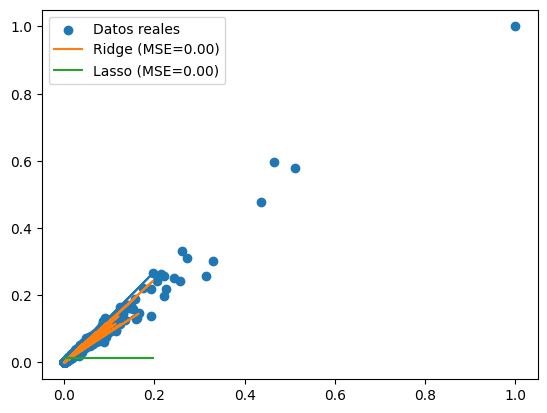

In [55]:


# Graficar resultados
plt.scatter(X.iloc[:,0], y, label='Datos reales')
plt.plot(X_test.iloc[:,0], y_test.to_numpy().flatten ())
plt.plot(X_test.iloc[:,0], y_pred_ridges.flatten (), label=f'Ridge (MSE={ridge_mse:.2f})')
plt.plot(X_test.iloc[:,0], y_pred_lasso.flatten (), label=f'Lasso (MSE={lasso_mse:.2f})')
plt.legend()
plt.show()

In [56]:
from pickle import dump

dump(ridge_model, open("../models/ridge_alpha-1.0.sav", "wb"))
dump(lasso_model, open("../models/lasso_alpha-1.0.sav", "wb"))